AIR QUALITY ANALYSIS USING PYTHON

Importing necessary libraries

In [2]:
import pandas as pd

Loading the Dataset to a pandas DataFrame

In [9]:
data = pd.read_csv('/content/air-quality-data')

In [ ]:
data

,Timestamp,PM2.5
0,01-01-2018 00:00,90.19
1,01-01-2018 01:00,86.98
2,01-01-2018 02:00,86.06
3,01-01-2018 03:00,94.04
4,01-01-2018 04:00,108.78
...,...,...
31856,31-12-2021 19:00,72.25
31857,31-12-2021 20:00,71.56
31858,31-12-2021 21:00,70.27
31859,31-12-2021 22:00,66.78


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  31861 non-null  object 
 1   PM2.5      31861 non-null  float64
dtypes: float64(1), object(1)
memory usage: 498.0+ KB


Changing the datatype of Timestamp from Object to datetime

In [10]:
data['Timestamp']=pd.to_datetime(data['Timestamp'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28179 entries, 0 to 28178
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  28179 non-null  datetime64[ns]
 1   PM2.5      28179 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 440.4 KB


Line chart of yearly average pollution

In [ ]:
data['Year']=data['Timestamp'].dt.year    #creating year column

In [ ]:
data.head()

,Timestamp,PM2.5,Year
0,2018-01-01 00:00:00,90.19,2018
1,2018-01-01 01:00:00,86.98,2018
2,2018-01-01 02:00:00,86.06,2018
3,2018-01-01 03:00:00,94.04,2018
4,2018-01-01 04:00:00,108.78,2018


In [ ]:
yearly_avg = data.groupby('Year')['PM2.5'].mean()

In [ ]:
print(yearly_avg)

Year
2018    54.468449
2019    49.511273
2020    42.386302
2021    44.850633
Name: PM2.5, dtype: float64


<Axes: xlabel='Year'>

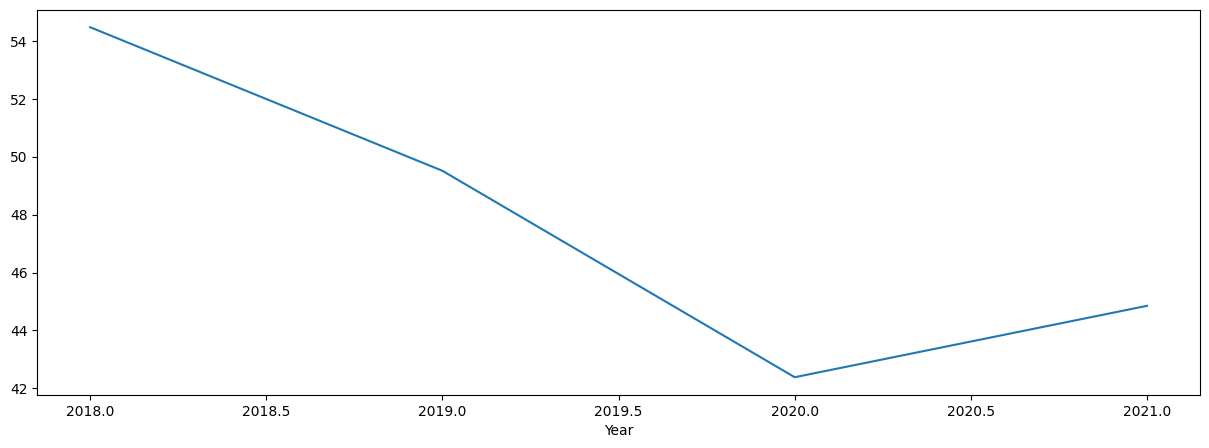

In [ ]:
yearly_avg.plot(kind='line',figsize=(15,5))

Area plot of  monthly average pollution

In [ ]:
data['Month']=data['Timestamp'].dt.month

In [ ]:
data.head()

,Timestamp,PM2.5,Year,Month
0,2018-01-01 00:00:00,90.19,2018,1
1,2018-01-01 01:00:00,86.98,2018,1
2,2018-01-01 02:00:00,86.06,2018,1
3,2018-01-01 03:00:00,94.04,2018,1
4,2018-01-01 04:00:00,108.78,2018,1


In [ ]:
monthly_avg=data.groupby('Month')['PM2.5'].mean()

In [ ]:
print(monthly_avg)

Month
1     65.829067
2     55.264291
3     49.666820
4     43.625814
5     39.816285
6     35.817151
7     31.884161
8     31.928300
9     36.324103
10    51.514817
11    60.017498
12    64.614865
Name: PM2.5, dtype: float64


<Axes: xlabel='Month'>

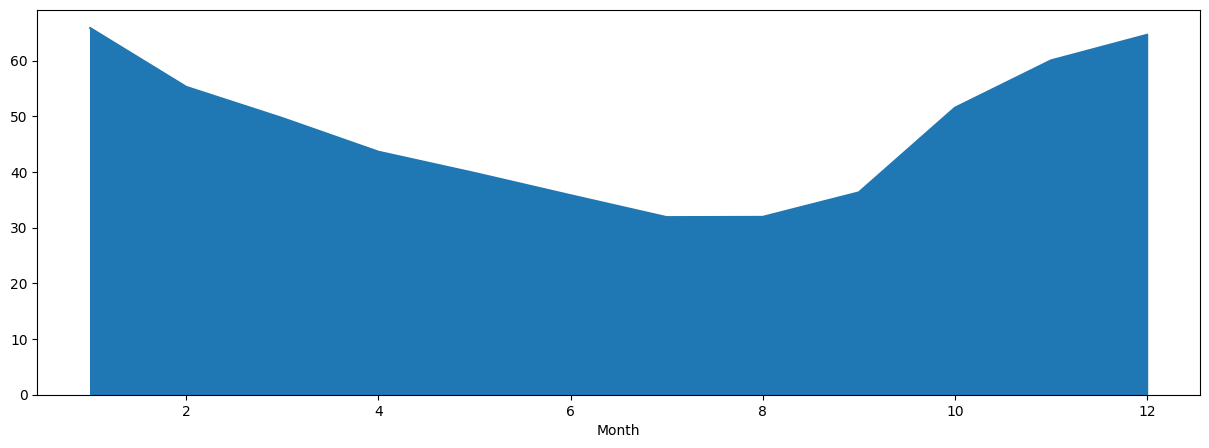

In [ ]:
monthly_avg.plot(kind='area',figsize=(15,5))

Bar graph of Hourly average pollution

In [ ]:
data['Hour']=data['Timestamp'].dt.hour

In [ ]:
data.head()

,Timestamp,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018,1,0
1,2018-01-01 01:00:00,86.98,2018,1,1
2,2018-01-01 02:00:00,86.06,2018,1,2
3,2018-01-01 03:00:00,94.04,2018,1,3
4,2018-01-01 04:00:00,108.78,2018,1,4


In [ ]:
hourly_avg=data.groupby('Hour')['PM2.5'].mean()

In [ ]:
print(hourly_avg)

Hour
0     47.068769
1     46.403946
2     46.952281
3     49.150798
4     51.296204
5     51.908798
6     49.907545
7     47.518554
8     44.996127
9     42.681736
10    40.931766
11    39.393820
12    38.789992
13    39.323346
14    42.638162
15    47.500464
16    51.244844
17    53.669757
18    54.317363
19    54.120371
20    52.784130
21    51.383525
22    49.940615
23    48.538064
Name: PM2.5, dtype: float64


<Axes: xlabel='Hour'>

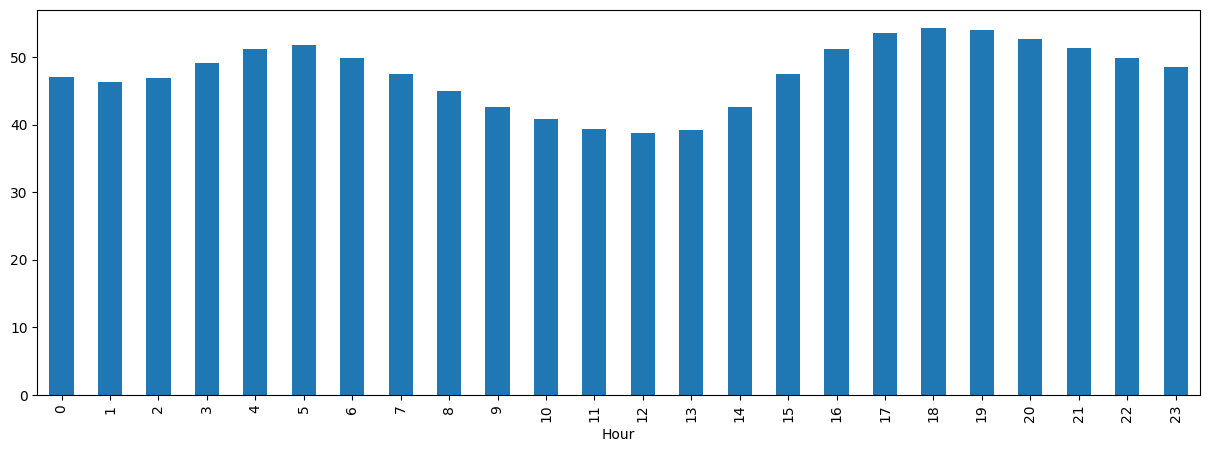

In [ ]:
hourly_avg.plot(kind='bar',figsize=(15,5))

Finding the months having 'Very Unhealthy' weather

In [ ]:
data.head()

,Timestamp,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018,1,0
1,2018-01-01 01:00:00,86.98,2018,1,1
2,2018-01-01 02:00:00,86.06,2018,1,2
3,2018-01-01 03:00:00,94.04,2018,1,3
4,2018-01-01 04:00:00,108.78,2018,1,4


In [ ]:
very_unhealthy=data[(data['PM2.5']>=150.5) & (data['PM2.5']<=250.4)]

In [ ]:
print(very_unhealthy)

                Timestamp   PM2.5  Year  Month  Hour
6     2018-01-06 17:00:00  150.89  2018      1    17
7     2018-11-07 21:00:00  245.63  2018     11    21
8     2018-11-08 00:00:00  175.19  2018     11     0
31    2018-11-07 22:00:00  232.03  2018     11    22
32    2018-11-08 01:00:00  169.15  2018     11     1
55    2018-11-07 20:00:00  223.21  2018     11    20
56    2018-11-08 03:00:00  160.34  2018     11     3
79    2018-11-07 18:00:00  212.56  2018     11    18
103   2018-11-07 19:00:00  207.41  2018     11    19
126   2018-11-07 17:00:00  183.19  2018     11    17
143   2018-11-07 23:00:00  173.67  2018     11    23
284   2018-01-13 16:00:00  165.45  2018      1    16
285   2018-01-13 17:00:00  177.58  2018      1    17
286   2018-01-13 18:00:00  175.32  2018      1    18
287   2018-01-13 19:00:00  166.60  2018      1    19
7578  2019-02-01 17:00:00  165.82  2019      2    17
7579  2019-02-01 18:00:00  157.99  2019      2    18
13697 2019-10-27 22:00:00  151.52  2019     10

In [ ]:
very_unhealthy.value_counts('Month')

Month
11    16
1      5
10     5
2      2
dtype: int64

Finding the months having 'Good' weather

In [ ]:
good= data[(data['PM2.5']>=0) & (data['PM2.5']<=12.0)]

In [ ]:
print(good)

                Timestamp  PM2.5  Year  Month  Hour
11423 2019-06-22 08:00:00  11.53  2019      6     8
11424 2019-06-22 09:00:00  10.31  2019      6     9
11471 2019-06-24 08:00:00  10.98  2019      6     8
11472 2019-06-24 09:00:00  11.64  2019      6     9
11535 2019-06-27 00:00:00  11.77  2019      6     0
11874 2019-07-13 09:00:00   7.02  2019      7     9
11875 2019-07-13 10:00:00   7.48  2019      7    10
11876 2019-07-13 11:00:00   7.61  2019      7    11
11879 2019-07-13 14:00:00  11.08  2019      7    14
11880 2019-07-13 15:00:00  10.21  2019      7    15
11881 2019-07-13 16:00:00  11.76  2019      7    16
12530 2019-08-25 03:00:00  11.71  2019      8     3
12542 2019-08-25 15:00:00  11.25  2019      8    15
12545 2019-08-25 18:00:00  10.68  2019      8    18
12626 2019-08-30 14:00:00  11.02  2019      8    14
12627 2019-08-30 15:00:00   9.93  2019      8    15
12628 2019-08-30 16:00:00   9.55  2019      8    16
12629 2019-08-30 17:00:00  10.28  2019      8    17
12630 2019-0

In [ ]:
good.value_counts('Month')

Month
8    33
7     6
6     5
1     3
4     3
5     2
dtype: int64

Finding the moderate weather in the year 2018

In [ ]:
moderate_year=data[(data['Year']==2018) & (data['PM2.5']>=12.1) & (data['PM2.5']<=35.5)]

In [ ]:
print(moderate_year)

                Timestamp  PM2.5  Year  Month  Hour
1355  2018-05-03 12:00:00  35.41  2018      5    12
1820  2018-01-04 04:00:00  33.34  2018      1     4
2038  2018-12-04 00:00:00  35.39  2018     12     0
2215  2018-04-19 13:00:00  28.90  2018      4    13
2306  2018-04-23 09:00:00  34.83  2018      4     9
...                   ...    ...   ...    ...   ...
9981  2018-06-28 06:00:00  19.75  2018      6     6
9982  2018-07-17 07:00:00  19.27  2018      7     7
9983  2018-07-16 08:00:00  18.96  2018      7     8
10004 2018-08-25 06:00:00  17.45  2018      8     6
10006 2018-07-17 08:00:00  18.77  2018      7     8

[2248 rows x 5 columns]


Finding weather in January month

In [ ]:
jan_weather=data[data['Month']==1]

In [ ]:
print(jan_weather)

                Timestamp   PM2.5  Year  Month  Hour
0     2018-01-01 00:00:00   90.19  2018      1     0
1     2018-01-01 01:00:00   86.98  2018      1     1
2     2018-01-01 02:00:00   86.06  2018      1     2
3     2018-01-01 03:00:00   94.04  2018      1     3
4     2018-01-01 04:00:00  108.78  2018      1     4
...                   ...     ...   ...    ...   ...
31155 2021-01-12 19:00:00   84.75  2021      1    19
31156 2021-01-12 20:00:00   85.94  2021      1    20
31157 2021-01-12 21:00:00   82.25  2021      1    21
31158 2021-01-12 22:00:00   80.18  2021      1    22
31159 2021-01-12 23:00:00   75.81  2021      1    23

[2872 rows x 5 columns]


In [ ]:
jan_weather_avg=jan_weather['PM2.5'].mean()
print(jan_weather_avg)
if jan_weather_avg>=0 and jan_weather_avg<=12.0:
  print('Good')
elif jan_weather_avg>=12.1 and jan_weather_avg<=35.4:
  print('Moderate')
elif jan_weather_avg>=35.5 and jan_weather_avg<=55.4:
  print('Unhealthy for sensitive groups')
elif jan_weather_avg>=55.5 and jan_weather_avg<=150.4:
  print('Unhealthy')
elif jan_weather_avg>=150.5 and jan_weather_avg<=250.4:
  print('Very Unhealthy')
else:
  print('Hazardous') hu

65.82906685236769
Unhealthy


Finding weather in July month

In [ ]:
july_weather=data[data['Month']==7]

In [ ]:
print(july_weather)

                Timestamp   PM2.5  Year  Month  Hour
145   2018-07-01 17:00:00  127.19  2018      7    17
146   2018-07-01 18:00:00  122.76  2018      7    18
148   2018-07-01 16:00:00  119.53  2018      7    16
151   2018-07-01 19:00:00  114.82  2018      7    19
153   2018-07-01 05:00:00  112.50  2018      7     5
...                   ...     ...   ...    ...   ...
31294 2021-07-12 19:00:00   61.29  2021      7    19
31295 2021-07-12 20:00:00   58.42  2021      7    20
31296 2021-07-12 21:00:00   56.96  2021      7    21
31297 2021-07-12 22:00:00   53.79  2021      7    22
31298 2021-07-12 23:00:00   53.29  2021      7    23

[2564 rows x 5 columns]


In [ ]:
july_weather_avg=july_weather['PM2.5'].mean()
print(july_weather_avg)
if july_weather_avg>=0 and july_weather_avg<=12.0:
  print('Good')
elif july_weather_avg>=12.1 and july_weather_avg<=35.4:
  print('Moderate')
elif july_weather_avg>=35.5 and july_weather_avg<=55.4:
  print('Unhealthy for sensitive groups')
elif july_weather_avg>=55.5 and july_weather_avg<=150.4:
  print('Unhealthy')
elif july_weather_avg>=150.5 and july_weather_avg<=250.4:
  print('Very Unhealthy')
else:
  print('Hazardous')

31.88416146645866
Moderate
